## Classification Modeling for Default of Credit Card Clients

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from time import time
from sklearn.model_selection import GridSearchCV

In [2]:
# reading data
df = pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# the dimensions of the data
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  30000
Number of columns:  25


### Based on https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit

SEX: Gender (1 = male; 2 = female)

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others)

AGE: Age (year)

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6: 

History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6: 

Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6: 

Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

### Exploratory Data Analysis

In [4]:
# summary statistic of each column
# if data has outliers or not because if so the mean would be so far from the median

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# check to see if there is any missing values

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<font color='red'> There are no missing values in any column of the dataset.

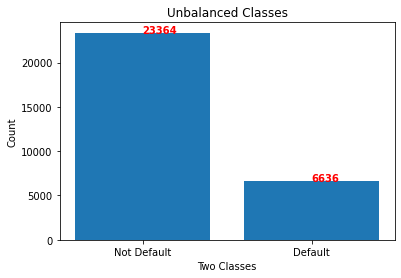

In [6]:
# check if the data is unbalanced or not

y = df["default.payment.next.month"].value_counts()
fig, ax = plt.subplots()
ax.bar(['Not Default', 'Default'],y)
plt.title('Unbalanced Classes')
plt.xlabel('Two Classes')
plt.ylabel('Count')
for i, v in enumerate(y):
    ax.text(i, v , str(v), color = 'red', fontweight = 'bold')
plt.show()

<font color = 'blue'> If the data has an unbalanced dependent variable the model accuracy will suffer due to bias.
    
<font color = 'blue'> This should be solved before modeling by using oversampling, undersampling or SMOTE method.

In [7]:
# dataset columns' names

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
# "ID" column is not a predictor so it's removed from the analysis
# these columns are the ones included in analysis:

col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month']

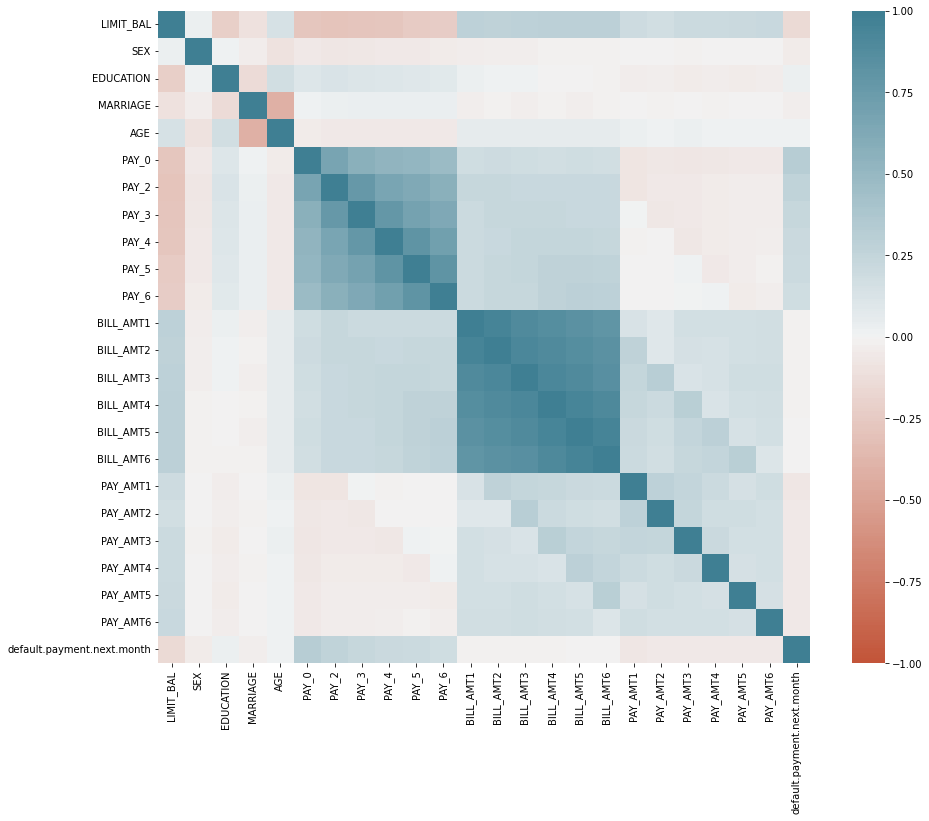

In [9]:
# building a correlation matrix

corr = df[col].corr()
f = plt.figure(figsize=(15, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

<font color = 'red'> The target value "default.payment.next.month" does not have any significant linear correlation with any of our predictors.

<font color = 'blue'> Another important point is the relationship between BILL_AMT1 through BILL_AMT6. There's a correlation matrix just for BILL_AMTs as below:

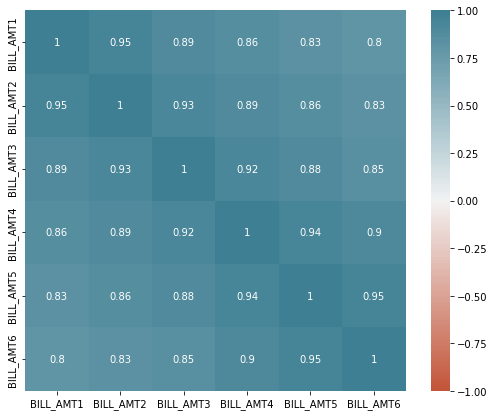

In [10]:
col = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
corr = df[col].corr()
f = plt.figure(figsize=(9, 7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True)

<font color='blue'> Correlation is decreasing with distance between months, which seems plausible because people's financial situation changes with time.

The correlation matrix shows that there's not strong linear correlation between the independent variables and dependent variable. To check what that means:

In [11]:
# building a contingency table to show the relationship between "SEX" and target variable

data_crosstab = pd.crosstab(df['default.payment.next.month'],
                            df['SEX'], rownames=['Default or not'])
data_crosstab.rename({0: 'Not Default', 1:'Default'}, axis=0, inplace=True)
data_crosstab.rename({1: 'Male', 2:'Female'}, axis=1, inplace=True)
data_crosstab

SEX,Male,Female
Default or not,,
Not Default,9015,14349
Default,2873,3763


In [12]:
# check the odds ratio target variable vs. "SEX"
# the sample size is causing the p-value to be low

# effect size here is to see if there's any association between sex and defaulting behavior

# odd(not default) = non-default man / non-default woman
# odd(default) = default man / default woman
# effect size or odds ratio = odd(not default)/odd(default) (because man is on numinator
# if men default more then the odds ratio is below one 
# the happens because the numinator decreases or denominator increases)

# fisher_exact test: it calculates if the odds rati value is more significant than 1
# 1 means there is difference between man and women
# p-value is low then we reject the null hypothesis menaing that there is difference between men and women defaulting 
# this p-value is because of the sample size not because the effect size is far from 1
# if the n is large then the t value (t = (X-mu)/(sd/sqrt(n))) is large then p-value small so the power (1-beta) is large

oddsratio, pvalue = stats.fisher_exact(data_crosstab)
print("OddsR: ", round(oddsratio, 2), "p-Value:", round(pvalue,12))

OddsR:  0.82 p-Value: 5e-12


<font color = 'blue'> Odds ratio of 0.82 means that the odds of women defaulting on their credit cards is 0.82 times the odds of men defaulting on their credit cards. Women are slighly less likely to default. As the correlation matrix suggested there's not a big difference between males and females with respect to target variable.

In [13]:
# what are possible marital statuses
# 0 value is not defined for marriage variable, it'll be treated as "unknown"

list(df['MARRIAGE'].unique())

[1, 2, 3, 0]

In [14]:
# building a contingency table to show the relationship between "MARRIAGE" and target variable

data_crosstab = pd.crosstab(df['default.payment.next.month'],
                            df['MARRIAGE'], rownames=['Default or not'])
data_crosstab.rename({0: 'Not Default', 1:'Default'}, axis=0, inplace=True)
data_crosstab.rename({1: 'Married', 2:'Single', 3:'Others', 0:'unknown'}, axis=1, inplace=True)
data_crosstab

MARRIAGE,unknown,Married,Single,Others
Default or not,,,,
Not Default,49,10453,12623,239
Default,5,3206,3341,84


In [15]:
# chi-squared to see if there's any association between target variable and "MARRIAGE"
# to avoid calculating odds ratio for all the possible values 2 by 2 we jumped to chi-squared test
# chi-squared tests if there is any association between two categorical features
# fisher exact gives me the exact p-value is while chi-squared is 
# the approximation of fisher exact test because chi-squared has assumed distribution while fisher exact test uses the 
# exact distribution of data

# fisher exact test I should have two by two matrix

c, p, dof, expected = stats.chi2_contingency(data_crosstab)
round(p, 9)

8.8e-08

<font color = 'blue'> The chi-squared test shows significant association between target variable and "MARRIAGE", but because correlation matrix shows low correlation then this association is die to the large sample size not large effect size.

In [16]:
# what are possible education statuses
# 0 value is not defined for education variable, it'll be treated as "unknown"

list(df['EDUCATION'].unique())

[2, 1, 3, 5, 4, 6, 0]

In [17]:
# building a contingency table to show the relationship between "EDUCATION" and target variable

data_crosstab = pd.crosstab(df['default.payment.next.month'],
                            df['EDUCATION'], rownames=['Default or not'])
data_crosstab.rename({0: 'Not Default', 1:'Default'}, axis=0, inplace=True)
data_crosstab.rename({0: 'unknown', 1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown'}, axis=1, inplace=True)
data_crosstab

EDUCATION,unknown,graduate school,university,high school,others,unknown,unknown
Default or not,,,,,,,
Not Default,14,8549,10700,3680,116,262,43
Default,0,2036,3330,1237,7,18,8


In [18]:
# chi-squared to see if there's any association between target variable and "EDUCATION"

c, p, dof, expected = stats.chi2_contingency(data_crosstab)
p

1.2332626245415605e-32

<font color = 'blue'> The chi-squared test shows significant association between target variable and "MARRIAGE", but because correlation matrix shows low correlation then this association is die to the large sample size not large effect size

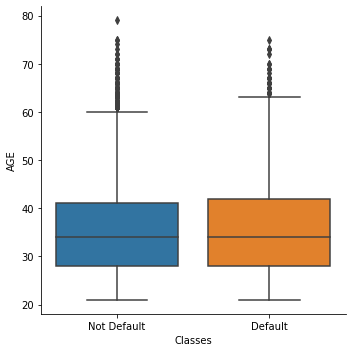

In [19]:
# by just looking at the distributions of two it doesn't look like there's a big difference in the effect size
# effect size = mu1 - mu2
ax = sns.catplot(x="default.payment.next.month", y="AGE", kind="box", data=df).set_xlabels('Classes')
ax.set_xticklabels(['Not Default','Default']);

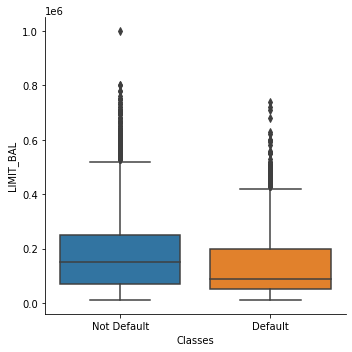

In [20]:
# based on the correlation matrix we see that limit_balance has negative correlation but absolute value of
# correlation is larger than age to 
# the dependent variable
ax = sns.catplot(x="default.payment.next.month", y="LIMIT_BAL", kind="box", data=df).set_xlabels('Classes')
ax.set_xticklabels(['Not Default','Default'])

### Feature Engineering and Scaling

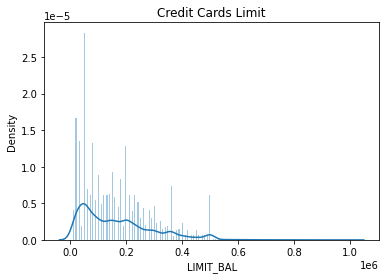

In [21]:
# credit card limit feature looks heavily right skewed, 
# which seems plausible because the number of people with high credit li

sns.distplot(df['LIMIT_BAL'], bins=250)
plt.title('Credit Cards Limit')
plt.show()

credit card limit feature looks heavily right skewed, which seems plausible because the number of people with high credit limit is low in society. 

Normalization of the numerical variables might not be a good idea because it might cause lose of information. However, we can scale them to the numbers between 0 and 1 to make sure that the model won't be bias towards large valued features.

In [22]:
# numerical columns

col = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [23]:
len(col)

14

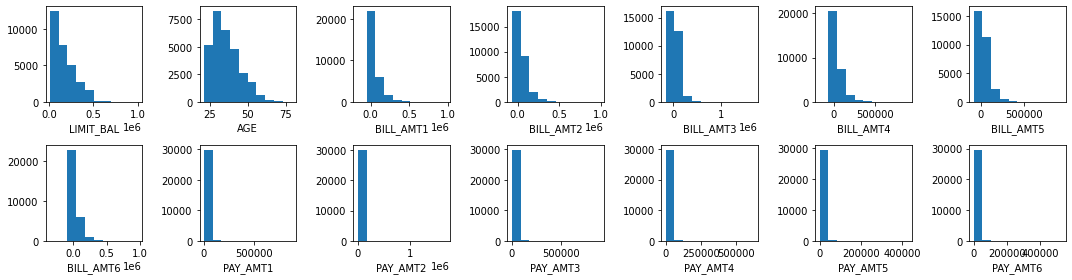

In [24]:
# histogram of numerical columns

fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(15,4))
col_count = 0
for i in range(2):
    for j in range(7):
        axes[i,j].hist(df[col[col_count]])
        axes[i,j].set_xlabel(col[col_count])
        col_count += 1

plt.tight_layout()    
plt.show()

<font color = 'blue'> It can be seen that the plots above have different scales which can cause problems. To address this issue MinMaxScaler function has been used.

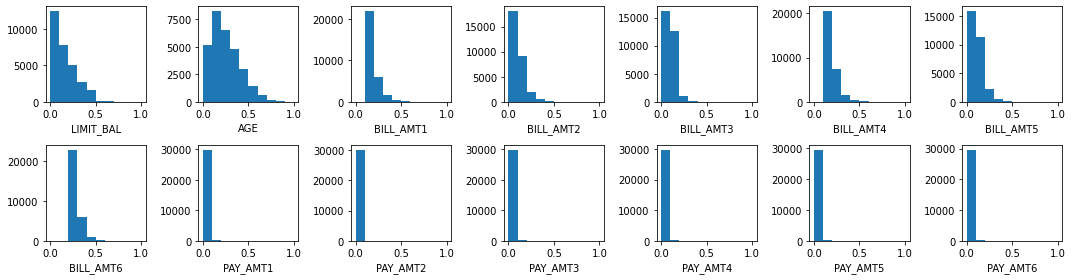

In [25]:
# scaling the numerical columns

min_max_scaler = preprocessing.MinMaxScaler()
for c in col:
    df[c] = min_max_scaler.fit_transform(df[c].values.reshape(-1, 1))
    
# drawing the histograms to check the result of scaling

fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(15,4))
col_count = 0
for i in range(2):
    for j in range(7):
        axes[i,j].hist(df[col[col_count]])
        axes[i,j].set_xlabel(col[col_count])
        col_count += 1

plt.tight_layout()    
plt.show()

<font color = 'blue'> Now all the numerical variables are scaled between 0 and 1.

All the categorical columns are encoded to the numerical values live "SEX" is either 1 or 2. Although this might seem a good idea for modeling but this method of encoding can cause misunderstanding to the model. Because 2 is larger than 1 but male and female are not quantities to be able to get compared this way. 

To address this issue, all the categorical independent variables are convereted to string values and then using get_dummies function we do hot-encoded to have them as numerical values for modeling.

In [26]:
# converting categorical columns from numerical values to string values

df['SEX'][df['SEX']==1] = 'male'
df['SEX'][df['SEX']==2] = 'female'
df['EDUCATION'] = df['EDUCATION'].astype(str)
df['MARRIAGE'][df['MARRIAGE']==1] = 'married'
df['MARRIAGE'][df['MARRIAGE']==2] = 'single'
df['MARRIAGE'][df['MARRIAGE']==3] = 'others'
df['MARRIAGE'][df['MARRIAGE']==0] = 'unknown'
df['PAY_0'] = df['PAY_0'].astype(str)
df['PAY_2'] = df['PAY_2'].astype(str)
df['PAY_3'] = df['PAY_3'].astype(str)
df['PAY_4'] = df['PAY_4'].astype(str)
df['PAY_5'] = df['PAY_5'].astype(str)
df['PAY_6'] = df['PAY_6'].astype(str)

In [27]:
df.iloc[1,:]

ID                                   2
LIMIT_BAL                     0.111111
SEX                             female
EDUCATION                            2
MARRIAGE                        single
AGE                           0.086207
PAY_0                               -1
PAY_2                                2
PAY_3                                0
PAY_4                                0
PAY_5                                0
PAY_6                                2
BILL_AMT1                     0.148892
BILL_AMT2                     0.067858
BILL_AMT3                     0.087817
BILL_AMT4                      0.16322
BILL_AMT5                     0.084074
BILL_AMT6                     0.263485
PAY_AMT1                           0.0
PAY_AMT2                      0.000594
PAY_AMT3                      0.001116
PAY_AMT4                       0.00161
PAY_AMT5                           0.0
PAY_AMT6                      0.003783
default.payment.next.month           1
Name: 1, dtype: object

In [28]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                           float64
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [29]:
# hot-encoding

df = pd.get_dummies(df)

In [30]:
# the new dimensions of the data

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  30000
Number of columns:  93


<font color = 'red'> The number of columns has increased significantly from 25 to 93. Now PCA will be used to reduce the dataset dimensions so the modeling speed would not be compromised.

In [31]:
# the dimensions of the data

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  30000
Number of columns:  93


In [32]:
y = df['default.payment.next.month']
X = df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_married', 'MARRIAGE_others',
       'MARRIAGE_single', 'MARRIAGE_unknown', 'PAY_0_-1', 'PAY_0_-2',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8']]

Due to usage of get_dummies function, the number of features has increased a lot. PCA is used to reduced the dimensions while keeping 95% of variaty of our dataset. 

In [33]:
# PCA to feature reduction
# 95% of variance

pca = PCA(n_components = 0.95)
pca.fit(X)
reduced = pca.transform(X)

In [34]:
X = pd.DataFrame(reduced)

# the dimensions of the data after PCA

print('Number of rows: ', X.shape[0])
print('Number of columns: ', X.shape[1])

Number of rows:  30000
Number of columns:  19


In [35]:
# splitting data into training and test sets with training having 80% of the dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As pointed out before, the data is very unbalanced in target variable. This can make the model a week model specialy for the class with smaller number of samples. To address this issues SMOTE method has been used.

Test set should stay as it is because we want the model to be able to be used in the real cases and in the real world the number of default customers are smaller than not default customers.

<font color = 'red'> SMOTE is only applied on training dataset

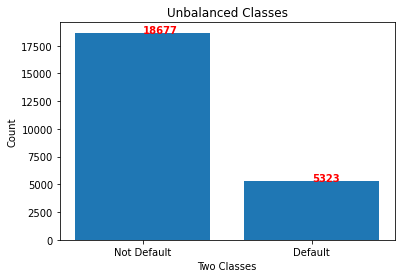

In [36]:
# first to see how unbalanced data originaly was

y = y_train.value_counts()
fig, ax = plt.subplots()
ax.bar(['Not Default', 'Default'],y)
plt.title('Unbalanced Classes')
plt.xlabel('Two Classes')
plt.ylabel('Count')
for i, v in enumerate(y):
    ax.text(i, v , str(v), color = 'red', fontweight = 'bold')
plt.show()

In [37]:
# doing SMOTE oversampling

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

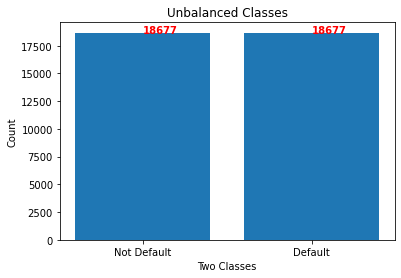

In [38]:
# show how data is not unbalanced in the target variable anymore

y = y_train.value_counts()
fig, ax = plt.subplots()
ax.bar(['Not Default', 'Default'],y)
plt.title('Unbalanced Classes')
plt.xlabel('Two Classes')
plt.ylabel('Count')
for i, v in enumerate(y):
    ax.text(i, v , str(v), color = 'red', fontweight = 'bold')
plt.show()

### Modeling

In [39]:
# starting with simple logistic regression to see if the data is linearly 

Ir = LogisticRegression().fit(X_train, y_train)
Ir_y_pred=Ir.predict(X_test)
print("Classification Report is:\n",classification_report(y_test, Ir_y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      4687
           1       0.49      0.58      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.78      0.78      6000



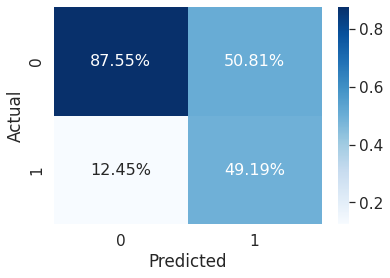

In [40]:
# building a confusion matrix

Ir_cf_matrix = confusion_matrix(y_test, Ir_y_pred)
df_cm = pd.DataFrame(Ir_cf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
# plt.figure(figsize = (10,7))
sns.set(font_scale=1.4);
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', cmap="Blues", annot=True,annot_kws={"size": 16});

H0: they don't default | Ha: they deault

87% is 1- alpha which says 87% of the samples they didn't deafult and we failed to reject H0 meaning we said correctly that they didn't default.

51.66% is alpha which says 51.66% of the samples they didn't deafult and we reject H0 meaning we said incorrectly that they 
defaulted. (type one error) FP

12.32% is beta which says 12.32% of the samples they deafulted and we failed to reject H0 meaning we said incorrectly that they didn't default. (type two error) FN

positive here is "default" or 1. 48% is the power of my model which is low
so my model is predicting "non-dfault" customers really well but struggles with default ones
sensetivity is power TP rate 48%
specificity is TN rate 87%

logistic regression actually worked better on test-set so it wasn't overfit


In the decision tree if the tree is not split 50-50 and we say 30-70 (not default-default) then I'm increasing the power in trade off I'm increasing the type 2 error (FN). Here we detecting default is more importnat so this trade off makes sense.

random forest was extremly overfit so overall considering my limitation logistic regression worked the best.

In [41]:
print("Mean Squared Error:\n",round(mean_squared_error(y_test,Ir_y_pred),2))

Mean Squared Error:
 0.22


In [42]:
dtc = DecisionTreeClassifier(max_depth=3)

In [43]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
#All the thresholds, size equals "dt.tree_.node_count"
print(dtc.tree_.threshold)
# dtc.tree_.threshold[0] = 1
# dtc.tree_.threshold[1] = 1
# dtc.tree_.threshold[2] = 1
# dtc.tree_.threshold[5] = -2
new_thre = [i+1 if i>=0 else i-1 for i in dtc.tree_.threshold]

for i in range(len(new_thre)):
    dtc.tree_.threshold[i] = new_thre[i]
print(dtc.tree_.threshold)

[ 0.44946727  0.07779066  0.88598117 -2.         -2.         -0.5107449
 -2.         -2.         -0.22667663 -0.34449401 -2.         -2.
  0.27536647 -2.         -2.        ]
[ 1.44946727  1.07779066  1.88598117 -3.         -3.         -1.5107449
 -3.         -3.         -1.22667663 -1.34449401 -3.         -3.
  1.27536647 -3.         -3.        ]


In [45]:
dtc_pred = dtc.predict(X_test)

In [46]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4687
           1       0.62      0.12      0.20      1313

    accuracy                           0.79      6000
   macro avg       0.71      0.55      0.54      6000
weighted avg       0.76      0.79      0.73      6000



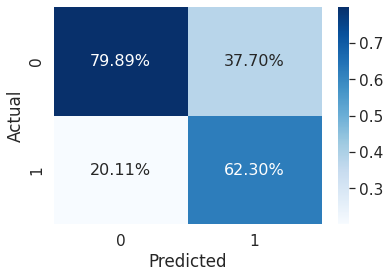

In [47]:
cf_matrix = confusion_matrix(y_test, dtc_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.set(font_scale=1.4);
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', cmap="Blues", annot=True,annot_kws={"size": 16});

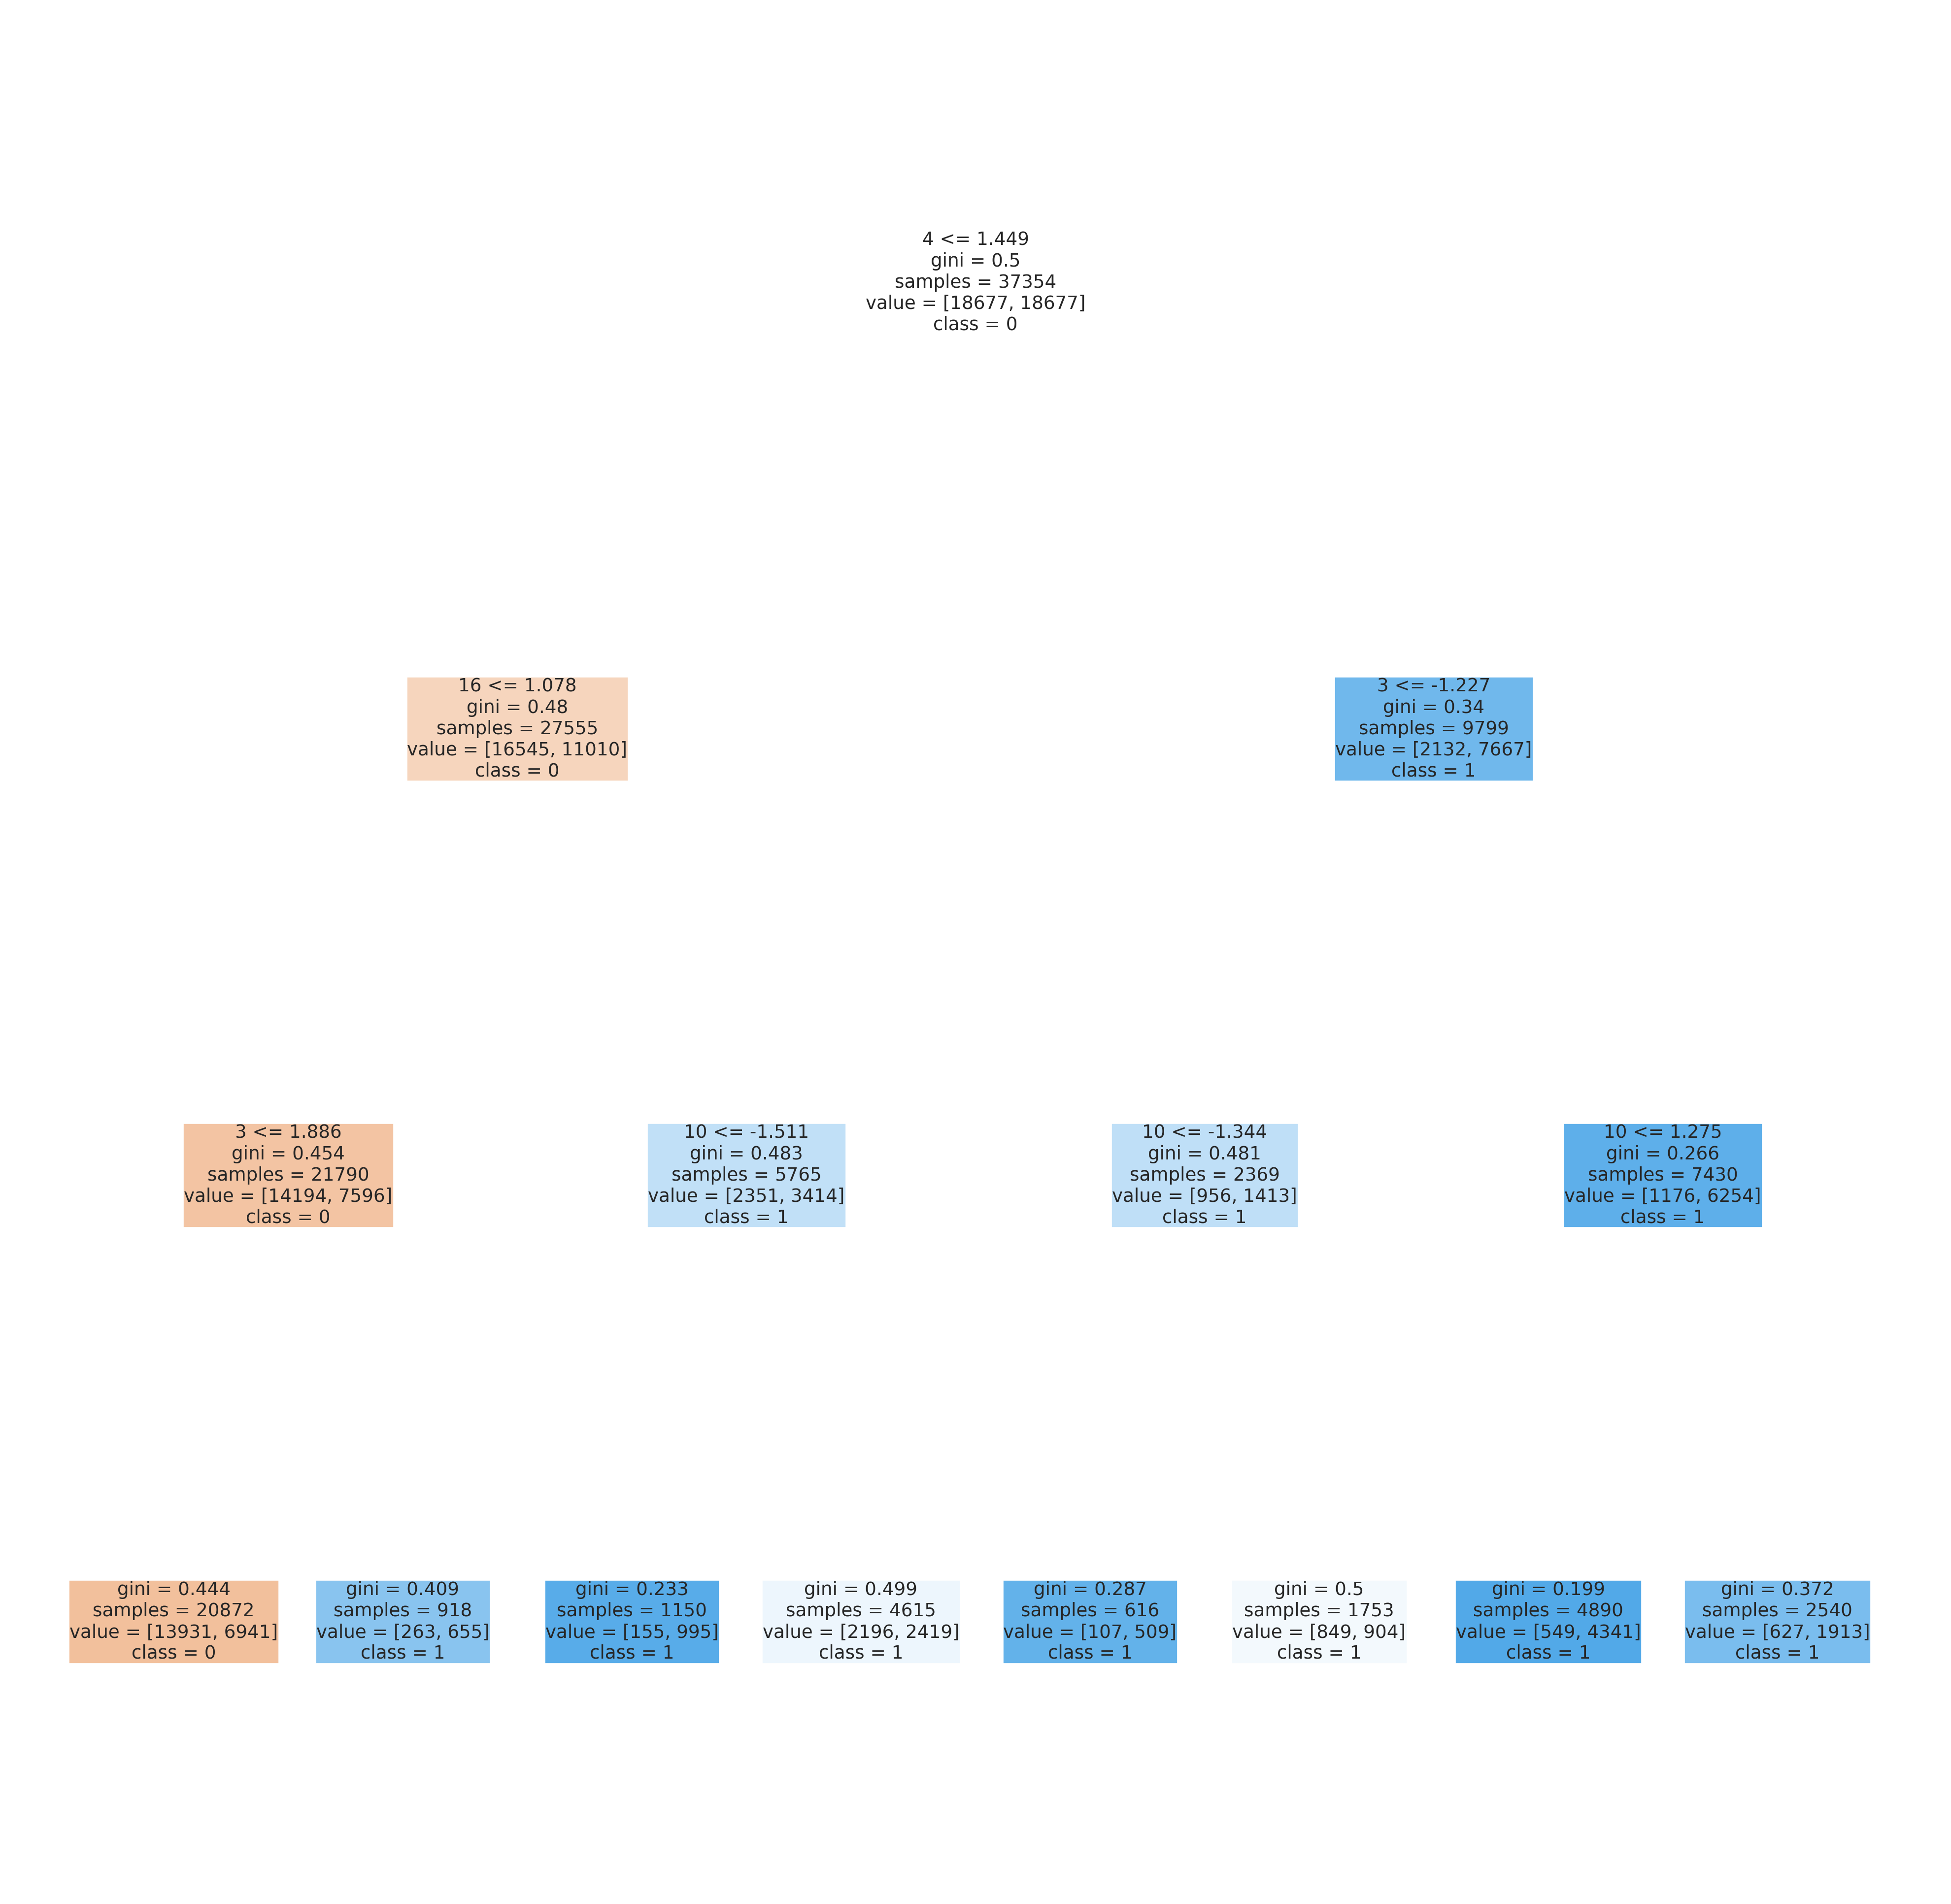

In [48]:
from sklearn import tree
fn=X_train.columns
cn=['0', '1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1200)

tree.plot_tree(dtc,
           feature_names = fn, 
           class_names=cn,
           filled = True);
fig.savefig('imagename.png')

### Model Selection

In [49]:
logisreg = LogisticRegression(n_jobs=-1)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_jobs=-1)
svm_rbfmodel = svm.SVC() #rbf kernel
# svm_polymodel = svm.SVC(kernel='poly') #poly kernel

In [50]:
start = time()
logisreg.fit(X_train, y_train)
end = time()
logi_time = end - start
start = time()
dtc.fit(X_train, y_train)
end = time()
dtc_time = end - start
start = time()
rfc.fit(X_train, y_train)
end = time()
rfc_time = end - start
start = time()
svm_rbfmodel.fit(X_train, y_train);
end = time()
svm_rbfmodel_time = end - start
# start = time()
# svm_polymodel.fit(X_train, y_train);
# end = time()
# svm_polymodel_time = end - start

In [51]:
logi_pred = logisreg.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
rbfsvm_pred = svm_rbfmodel.predict(X_test)
# polysvm_pred = svm_polymodel.predict(X_test)

                         Model     Score       Time
0          Logistic Regression  0.777000   1.680567
3  Support Vector Machines RBF  0.766000  58.461302
2                Random Forest  0.744000   8.212796
1                Decision Tree  0.693833   1.716053


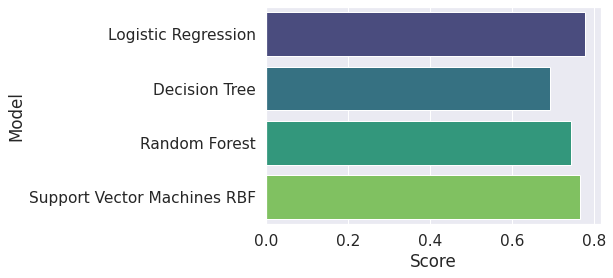

In [52]:
# Getting Accuracy Score
acc_logisreg = accuracy_score(y_test, logi_pred)
acc_dtree = accuracy_score(y_test, dtc_pred)
acc_rf = accuracy_score(y_test, rfc_pred)
acc_svc_rbf = accuracy_score(y_test, rbfsvm_pred)
# acc_svc_poly = accuracy_score(y_test, polysvm_pred)

# Model Selection
models = pd.DataFrame({
'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
          'Support Vector Machines RBF'],
'Score': [acc_logisreg, acc_dtree, acc_rf, acc_svc_rbf], 
'Time': [logi_time, dtc_time, rfc_time, svm_rbfmodel_time]})

print(models.sort_values(by='Score', ascending=False))
sns.barplot(x = models['Score'], y = models['Model'], palette='viridis');

In [53]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
# param_grid = { 
#     'n_estimators': [100, 300, 500],
#     'max_depth' : [4, 8, 12, 16, 20]
# }

In [55]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

NameError: name 'param_grid' is not defined

In [ ]:
CV_rfc.best_params_

In [ ]:
y_pred=CV_rfc.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test, y_pred))

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.set(font_scale=1.4);
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', cmap="Blues", annot=True,annot_kws={"size": 16});

In [ ]:
print("Mean Squared Error:\n",round(mean_squared_error(y_test,y_pred),2))